# Heat Map
This heat map shows the difference between the percentage of boys vs the percentage of girls entering primary school over time by continent. The difference is calculated by the % of boys – the % of girls. Ideally, we would like for this difference to be approximately 0% – meaning just as many girls are entering primary school. The lighter the box, the larger the gap is between the number of boys vs the number of girls entering primary school. Luckily, most squares are darker shades of blue and most countries become darker shades of blue over time – meaning the trend shows us that inequality in the number of boys vs girls entering into primary school is decreasing.

### SetUp

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# helper function
def assign_continent(country_code):
    """given a 3 letter country code,
    return the continent the country belongs to"""
    try:
        row = country_to_continent[country_to_continent.Three_Letter_Country_Code == country_code]
        continent = row.Continent_Name.values[0]
        return continent
    except:
        return None

### Pre-Processing
1. Filter Columns
2. Rename Columns
3. Assign each continennt to each country
4. Filter out the non-country level rows
5. Pivot

In [3]:
# read in data
entry = pd.read_csv('../data/entry_to_primary_edu.csv')
country_to_continent = pd.read_csv('../data/country_continent.csv')

# 1. filter
country_to_continent = country_to_continent[['Three_Letter_Country_Code', 'Continent_Name', 'Country_Name']]
entry = entry[['Indicator', 'LOCATION', 'Country', 'Time', 'Value']]
entry = entry[entry.Time != 2018]  # 2018 missing data

# 2. rename column
entry = entry.replace('New entrants to Grade 1 of primary education, female (number)', 'Girls')
entry = entry.replace('New entrants to Grade 1 of primary education, male (number)', 'Boys')

# 3. Assign each country their continent
entry['Continent'] = entry.LOCATION.apply(lambda x: assign_continent(x))

# 4. keep only country level rows
countries = country_to_continent.Three_Letter_Country_Code.unique()
entry_by_country = entry[entry.LOCATION.isin(countries)]

# 5. pivot
entry_pivot = pd.pivot_table(entry_by_country, values='Value', 
                             index=['Continent', 'LOCATION', 'Country', 'Time'], 
                             columns='Indicator')

### Calculations

In [4]:
# total enrollment by continent
entry_by_continent = entry_pivot.groupby(['Continent', 'Time']).sum()

# % of difference in enrollment rate boy vs girls
entry_by_continent['Dif%'] = entry_by_continent.apply(lambda x: ((x[0]/(x[0] + x[1])) - (x[1]/(x[0] + x[1])))*100, 
                                                      axis=1)

entry_by_continent.head()

Indicator              Boys        Girls      Dif%
Continent Time                                    
Africa    2014  14242943.00  13325643.00  3.327338
          2015  13078330.00  11588142.00  6.041350
          2016  11213580.04  10211340.81  4.677913
          2017   9219238.00   8763717.00  2.533071
Asia      2014  34920277.00  31515025.00  5.125666

### Plot

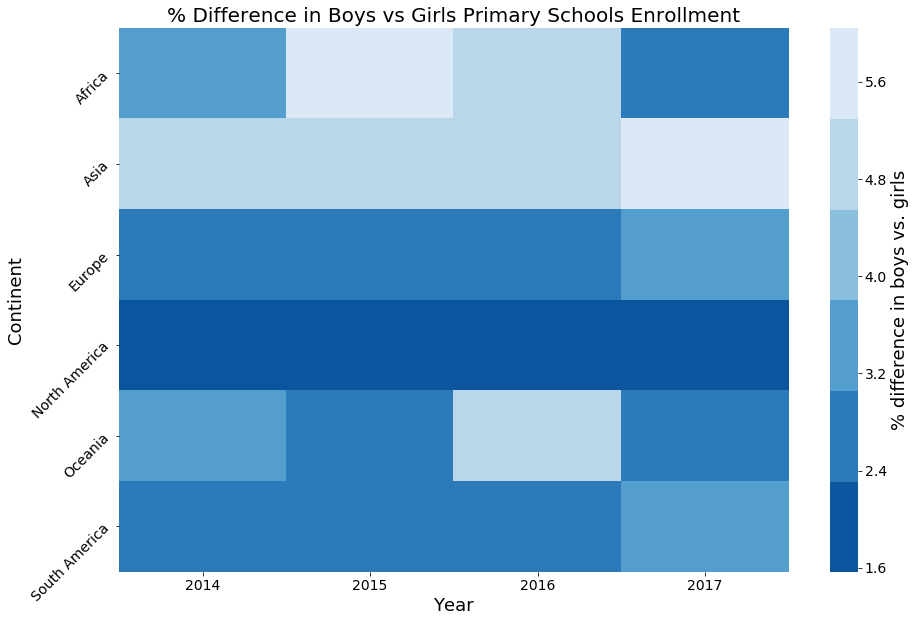

In [5]:
# data to plot
matrix = entry_by_continent.reset_index().pivot(index='Continent', columns= 'Time', values='Dif%')

# plot size
plt.figure(figsize=(15,10))

# title
plt.title('% Difference in Boys vs Girls Primary Schools Enrollment',
         fontsize=20)

# data
sns.heatmap(matrix, cmap=sns.color_palette("Blues_r"),
           cbar_kws=dict(use_gridspec=False,location="right", label='% difference in boys vs. girls'))

# color bar
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=14)
cax.yaxis.label.set_size(18)

# axis
plt.xlabel('Year', fontsize=18)
plt.ylabel('Continent', fontsize=18)
plt.tick_params(axis='y', labelrotation=45)
plt.tick_params(labelsize=14)

# plt.show()
plt.savefig('HeatMap')